In [1]:
# read in all the .csv files in the directory output/datasets and save them as pandas dataframes with the name of the file as the dataframe name
import pandas as pd
import numpy as np
import os 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# get data file names
path =r'ml_datasets' # use your path
filenames = glob.glob(path + "\\*.csv")
print(filenames)

# read in datafranes
dfs = []
for filename in filenames:
    # get the name of the file
    name = filename.split("\\")[1].split(".")[0]
    # create a dataframe with the name of the file. us pandas
    vars()[name] = pd.read_csv(filename)
    # append the dataframe to the list of dataframes
    dfs.append(vars()[name])

# read in this file C:\Users\cayde\Desktop\Grad_School_stuff\ghosh_proj_malware_class\full_dataset_work\ml_datasets\og_dataset.csv and save as pandas df
og_dataset = pd.read_csv("ml_datasets\\og_dataset.csv")

['ml_datasets\\jsd_0_5_gn_dataset.csv', 'ml_datasets\\jsd_0_5_louvain_dataset.csv', 'ml_datasets\\jsd_mst_gn_dataset.csv', 'ml_datasets\\jsd_mst_louvain_dataset.csv', 'ml_datasets\\kld_mst_gn_dataset.csv', 'ml_datasets\\kld_mst_louvain_dataset.csv', 'ml_datasets\\og_dataset.csv']


In [3]:
# First, split your og_dataset
og_dataset = og_dataset.drop(columns=['trace_id'])
train_data, test_data = train_test_split(og_dataset, test_size=0.3, random_state=42)

# Then get a list of all column names in the og_dataset
og_cols = og_dataset.columns.tolist()

# Loop over your dataframes
for i, df in enumerate(dfs):
    df = df.drop(columns=['trace_id'])
    # Get a list of the column names in the current df
    df_cols = df.columns.tolist()
    # Find out which columns are in og_dataset but not in this df
    missing_cols = set(og_cols) - set(df_cols)
    
    # For each missing column, add it to this df with all values set to 0
    for col in missing_cols:
        df[col] = 0

    # Now we want to reorder the columns to match og_dataset
    df = df[og_cols]
    dfs[i] = df

C:\Users\cayde\AppData\Local\Temp\ipykernel_18216\3705258574.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = 0
C:\Users\cayde\AppData\Local\Temp\ipykernel_18216\3705258574.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = 0
C:\Users\cayde\AppData\Local\Temp\ipykernel_18216\3705258574.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instea

In [4]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    true_positive = sum((y_test == 1) & (y_pred_test == 1))
    true_negative = sum((y_test == 0) & (y_pred_test == 0))
    false_positive = sum((y_test == 0) & (y_pred_test == 1))
    false_negative = sum((y_test == 1) & (y_pred_test == 0))

    # Add a check to avoid ZeroDivisionError
    if true_positive + false_negative != 0:
        sensitivity = true_positive / (true_positive + false_negative)
    else:
        sensitivity = 0

    if true_negative + false_positive != 0:
        specificity = true_negative / (true_negative + false_positive)
    else:
        specificity = 0

    return sensitivity, specificity

def apply_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    sensitivity, specificity = calculate_sensitivity_specificity(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)

    return accuracy, f1, sensitivity, specificity, conf_matrix

models = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

model_names = [
    'Logistic Regression',
    'K-Nearest Neighbors',
    'Decision Tree',
    'Random Forest'
]

In [ ]:
### run the orginial dataset here

# define a dictionary to store results for each dataset
results = {}

# fill NaNs with 0
og_dataset = og_dataset.fillna(0)

# split predictors and target for og_dataset
X_og = og_dataset.drop(columns=['label'])
y_og = og_dataset['label']

# list to store metrics for each model for og_dataset
og_metrics = []

# directory to save output
output_dir = 'output'
og_output_dir = os.path.join(output_dir, 'og_dataset')
if not os.path.exists(og_output_dir):
    os.makedirs(og_output_dir)

# loop over all models
for j, model in enumerate(models):
    model_name = model_names[j]
    model_dir = os.path.join(og_output_dir, model_name)
    
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    # apply model
    accuracy, f1, sensitivity, specificity, conf_matrix = apply_model(model, X_og, X_og, y_og, y_og)
    og_metrics.append([accuracy, f1, sensitivity, specificity])
    
    # print metrics
    print(f'Metrics for {model_name}:')
    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Specificity: {specificity}')
    print(f'Confusion Matrix:\n {conf_matrix}')
    print('-'*50)

    # save metrics to a csv file
    metrics_df = pd.DataFrame([[accuracy, f1, sensitivity, specificity]], 
                              columns=['Accuracy', 'F1', 'Sensitivity', 'Specificity'],
                              index=[model_name])
    metrics_df.to_csv(os.path.join(model_dir, 'metrics.csv'))

    # plot confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", square = True, cmap = 'Blues')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title(f'Confusion Matrix for {model_name}')
    fig.savefig(os.path.join(model_dir, 'confusion_matrix.png'))

# Comparing the performance metrics across models
og_metrics_df = pd.DataFrame(og_metrics, columns=['Accuracy', 'F1', 'Sensitivity', 'Specificity'], index=model_names)
og_metrics_df = og_metrics_df.drop(columns=['Sensitivity', 'Specificity'])  # drop the 'Sensitivity' and 'Specificity' columns
og_metrics_df = og_metrics_df.transpose()  # transpose the dataframe for easier plotting

# plot the metrics
fig, ax = plt.subplots(figsize=(12,8))
og_metrics_df.plot(kind='bar', ax=ax)
ax.set_title('Performance Metrics Comparison Across Models for og_dataset')
ax.set_ylabel('Score')
plt.xticks(rotation=45)
fig.savefig(os.path.join(og_output_dir, 'metrics_comparison.png'))

# add to results
results["og_dataset"] = og_metrics_df

# save results to a csv file
results_df = pd.concat(results)
results_df.to_csv(os.path.join(og_output_dir, 'results.csv'))

# save the train and test datasets
train_data.to_csv(os.path.join(og_output_dir, 'train_data.csv'), index=False)
test_data.to_csv(os.path.join(og_output_dir, 'test_data.csv'), index=False)

C:\Users\cayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for Logistic Regression:
Accuracy: 0.369901547116737
F1 Score: 0.3605514841400457
Sensitivity: 0
Specificity: 0
Confusion Matrix:
 [[ 26  27  37   3   0  10   0   3]
 [  1 125  44   5   8  93   2  11]
 [  0  15 204   2   2  46   2  27]
 [  5  30  63  27  21 110   2   8]
 [  0  42  46   6  45  90  13  17]
 [  2  52  66  11  10 149   5  13]
 [  6  12  22   2   6 110 112  22]
 [  2  29  68   6  13  87   9 101]]
--------------------------------------------------
Metrics for K-Nearest Neighbors:
Accuracy: 0.6572902015939991
F1 Score: 0.6529539328777851
Sensitivity: 0
Specificity: 0
Confusion Matrix:
 [[ 92   2   3   1   2   0   4   2]
 [  3 215   9  11  17  14   7  13]
 [  2  15 235  25   9   5   1   6]
 [ 11  14  17 173  20   8  11  12]
 [  1  22  12  27 160  13   5  19]
 [  5  42  33  33  26 134  12  23]
 [  7  14  12  12   5  14 221   7]
 [  3  32  24  30  23  19  12 172]]
--------------------------------------------------
Metrics for Decision Tree:
Accuracy: 0.9971870604781997
F

C:\Users\cayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for Logistic Regression:
Accuracy: 0.3239568682606657
F1 Score: 0.29758619177060186
Sensitivity: 0
Specificity: 0
Confusion Matrix:
 [[  4  10  35   0   0  51   3   3]
 [  3 113  30   1  15 110  10   7]
 [  0  29 176   2   2  57  13  19]
 [  1  39  38  22  15 105  37   9]
 [  0  54  25   7  34 103  17  19]
 [  1  60  46   3   9 160  19  10]
 [  3  18  47   3   1  71 131  18]
 [  1  66  62   6   6  95  28  51]]
--------------------------------------------------
Metrics for K-Nearest Neighbors:
Accuracy: 0.5039849976558838
F1 Score: 0.5038167605978942
Sensitivity: 0
Specificity: 0
Confusion Matrix:
 [[ 64   9   5  12   0   7   5   4]
 [  7 164   8  18  17  40  16  19]
 [  3  28 196  33  11  11   5  11]
 [  8  18  32 135  15  25  11  22]
 [  2  38  15  41 106  28   8  21]
 [  6  56  27  29  25 125  18  22]
 [  8  28   9  25   7  33 168  14]
 [  7  62  21  33  18  34  23 117]]
--------------------------------------------------
Metrics for Decision Tree:
Accuracy: 0.7313642756680732

C:\Users\cayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for Logistic Regression:
Accuracy: 0.360056258790436
F1 Score: 0.3499645450580176
Sensitivity: 0
Specificity: 0
Confusion Matrix:
 [[ 13   9  38   3   0  40   0   3]
 [  1 110  50   6   5 109   2   6]
 [  0  15 209   3   1  49   3  18]
 [  5  28  65  30  15 113   3   7]
 [  0  31  58   9  43 104   5   9]
 [  0  33  77  12   8 166   4   8]
 [  6   9  22   6   4 115 110  20]
 [  2  25  78   5   7 103   8  87]]
--------------------------------------------------
Metrics for K-Nearest Neighbors:
Accuracy: 0.6568213783403657
F1 Score: 0.6523678205830497
Sensitivity: 0
Specificity: 0
Confusion Matrix:
 [[ 92   2   3   1   2   0   4   2]
 [  3 215   9  11  17  14   7  13]
 [  2  14 236  25   9   5   1   6]
 [ 11  14  17 172  21   8  11  12]
 [  1  22  12  27 160  13   5  19]
 [  5  43  33  33  26 133  12  23]
 [  7  14  12  12   5  14 221   7]
 [  3  32  24  30  23  19  12 172]]
--------------------------------------------------
Metrics for Decision Tree:
Accuracy: 0.9971870604781997
F

C:\Users\cayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for Logistic Regression:
Accuracy: 0.17346460384435067
F1 Score: 0.14412380131707644
Sensitivity: 0
Specificity: 0
Confusion Matrix:
 [[  0  47   0   5   3  42   2   7]
 [  0 102   4  11  21  89  10  52]
 [  0  72   4   2   9 191   3  17]
 [  0  73   6  10   6 133   5  33]
 [  0  77   2   6  22 110   8  34]
 [  0 101   1   7  21 139   7  32]
 [  0  41   6   8  46 120  42  29]
 [  0  54   1  18  15 164  12  51]]
--------------------------------------------------
Metrics for K-Nearest Neighbors:
Accuracy: 0.23394280356305672
F1 Score: 0.22393144097039208
Sensitivity: 0
Specificity: 0
Confusion Matrix:
 [[  8  36   4   3  20  14   9  12]
 [  4 107   6  20  47  49  46  10]
 [ 14  55  30  72  28  18  20  61]
 [  4  45  22  63  43  25  49  15]
 [  4  47   4  45  83  18  43  15]
 [  3  77   8  38  45  68  41  28]
 [  9  42  38  27  27  37  92  20]
 [  3  64  21  41  44  56  38  48]]
--------------------------------------------------
Metrics for Decision Tree:
Accuracy: 0.3699015471167

C:\Users\cayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cayde\AppData\Local\Temp\ipykernel_18216\177325749.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(5,5))


Metrics for Logistic Regression:
Accuracy: 0.3652133145804032
F1 Score: 0.3571214414344731
Sensitivity: 0
Specificity: 0
Confusion Matrix:
 [[ 15  10  35   3   0  40   0   3]
 [  1 110  50   6   5 110   2   5]
 [  0  15 206   2   1  53   1  20]
 [  6  29  64  33   8 115   2   9]
 [  0  31  54  10  41 106   4  13]
 [  0  30  78   8   8 171   5   8]
 [  5   7  23   5   2 118 112  20]
 [  2  22  81   5   2 105   7  91]]
--------------------------------------------------
Metrics for K-Nearest Neighbors:
Accuracy: 0.6572902015939991
F1 Score: 0.6528500115364954
Sensitivity: 0
Specificity: 0
Confusion Matrix:
 [[ 92   2   3   1   2   0   4   2]
 [  3 215   9  11  17  14   7  13]
 [  2  14 236  25   9   5   1   6]
 [ 11  16  17 173  19   8  11  11]
 [  1  22  12  27 160  13   5  19]
 [  5  43  33  33  26 133  12  23]
 [  7  14  12  12   5  14 221   7]
 [  3  32  24  31  22  19  12 172]]
--------------------------------------------------
Metrics for Decision Tree:
Accuracy: 0.9971870604781997


C:\Users\cayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for Logistic Regression:
Accuracy: 0.25035161744022505
F1 Score: 0.23140235096039433
Sensitivity: 0
Specificity: 0
Confusion Matrix:
 [[  7  11   8   2   6  37  32   3]
 [  8  23  12   5  79  65  39  58]
 [  2   7 105   8  24  83  50  19]
 [  6   8  37  14  47  55  72  27]
 [  2  25  29   6  76  56  47  18]
 [  7  20  16  10  77  80  42  56]
 [  2   8  19   5  17  45 149  47]
 [  1  21  45   7  60  52  49  80]]
--------------------------------------------------
Metrics for K-Nearest Neighbors:
Accuracy: 0.23347398030942335
F1 Score: 0.23160709183141204
Sensitivity: 0
Specificity: 0
Confusion Matrix:
 [[ 24   4   8   0  36  16   8  10]
 [  7  58  11  21  75  54  40  23]
 [ 17  26  68  20  40  72  14  41]
 [ 14  22  40  40  41  31  54  24]
 [ 10  47  26  27  75  28  29  17]
 [ 24  52  18  24  63  68  31  28]
 [  9  17  42  22  20  34 108  40]
 [ 17  34  38  26  56  46  41  57]]
--------------------------------------------------
Metrics for Decision Tree:
Accuracy: 0.2733239568682

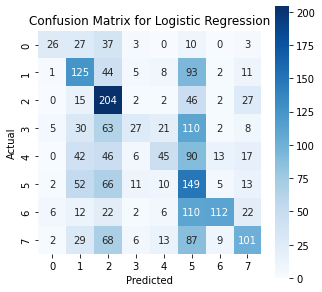

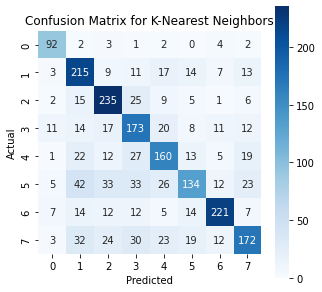

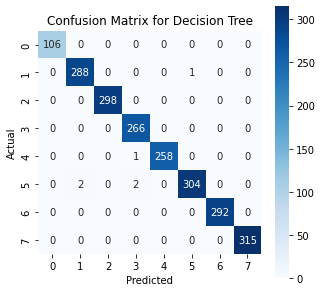

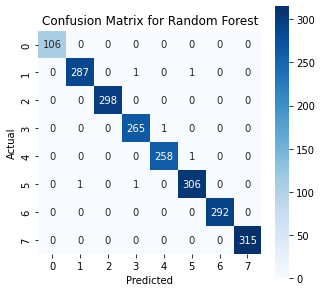

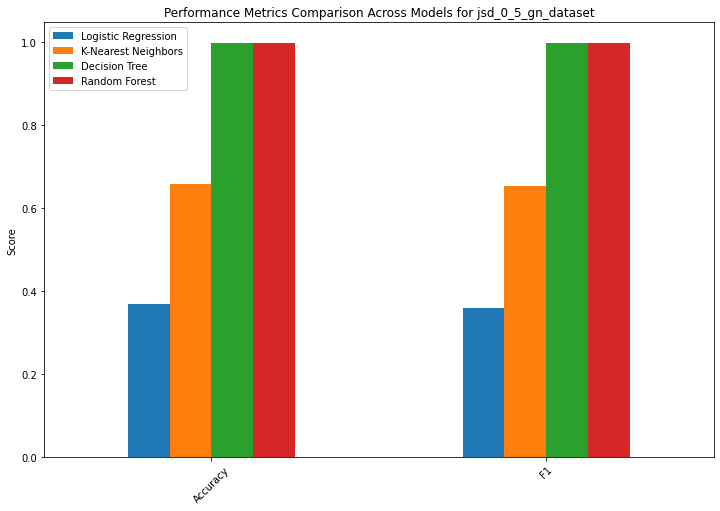

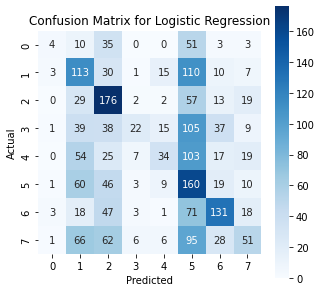

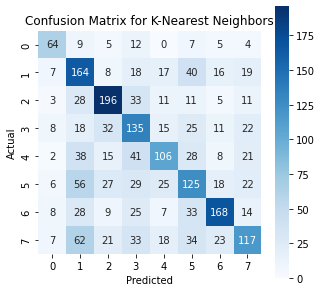

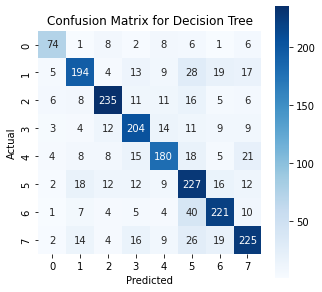

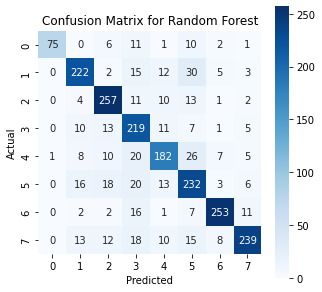

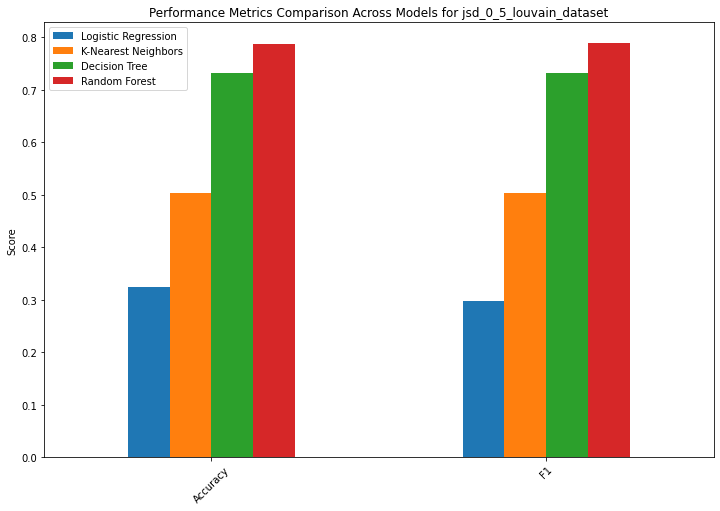

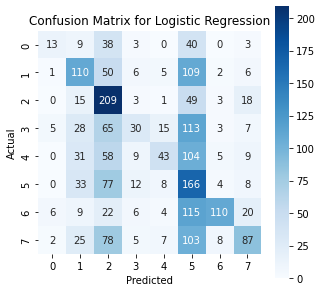

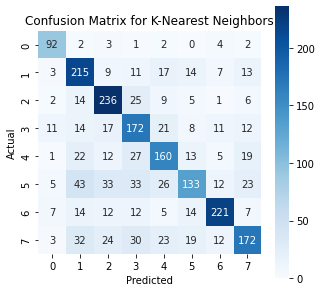

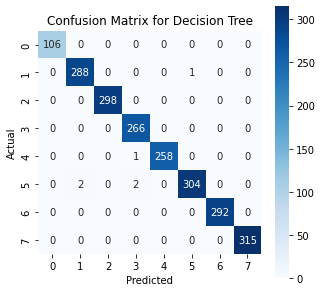

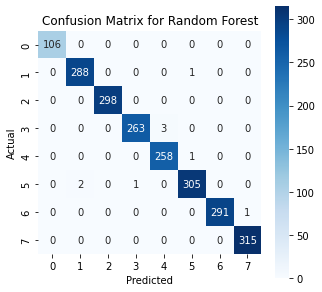

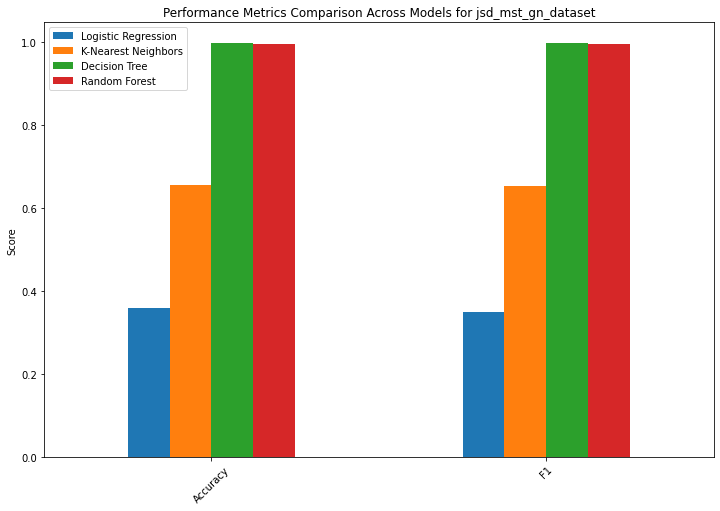

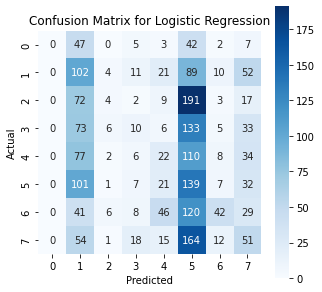

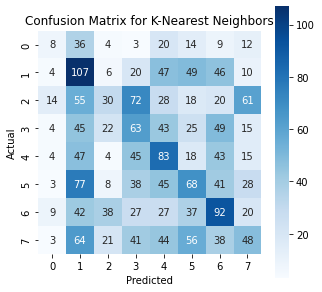

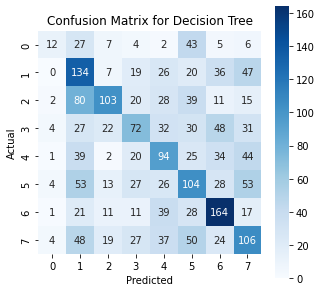

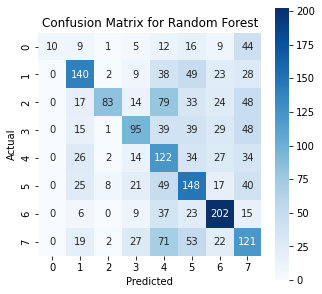

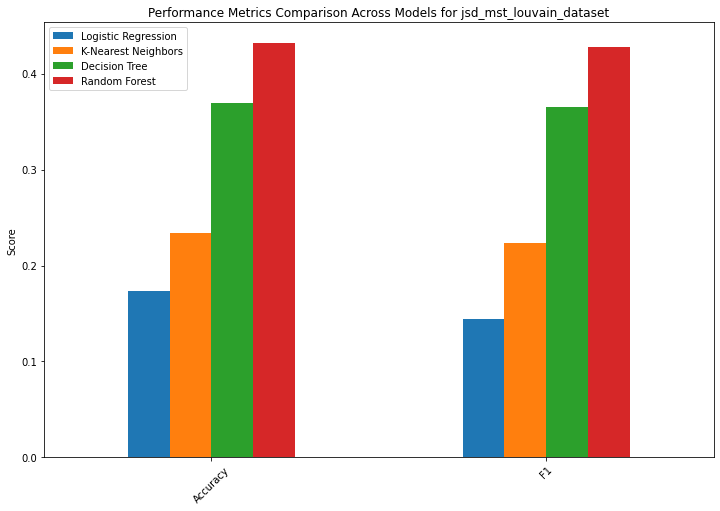

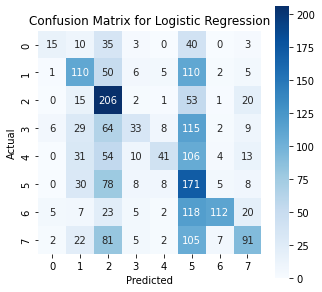

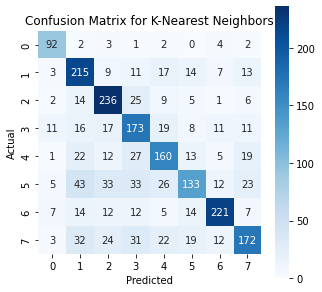

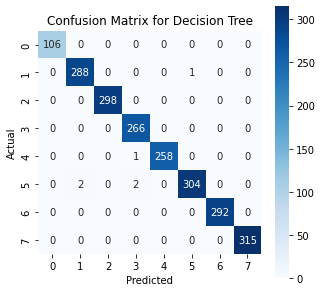

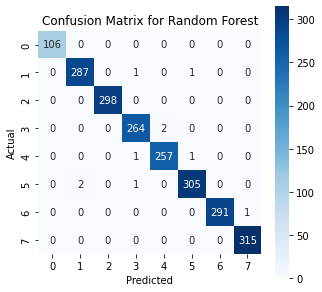

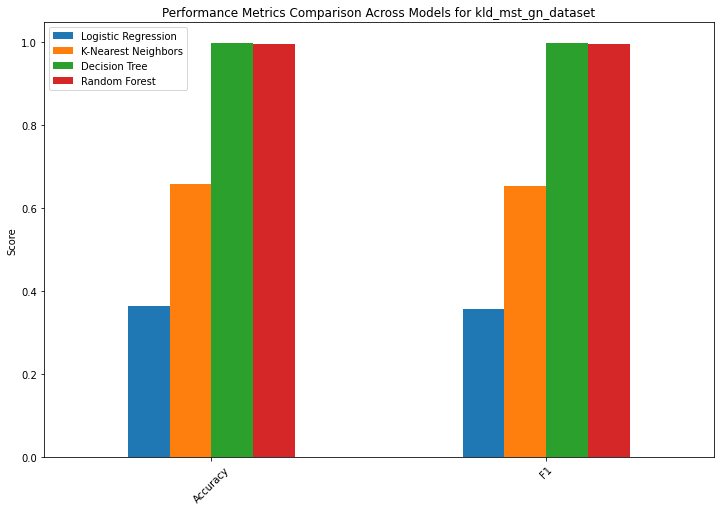

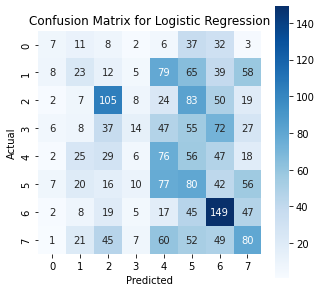

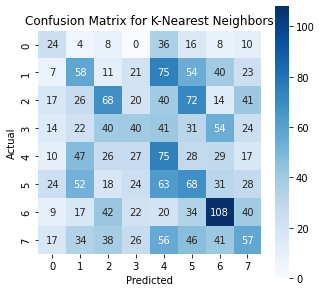

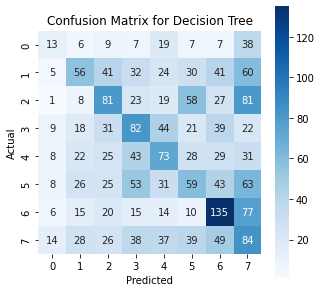

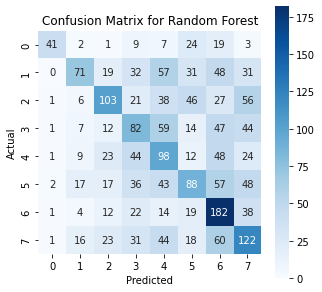

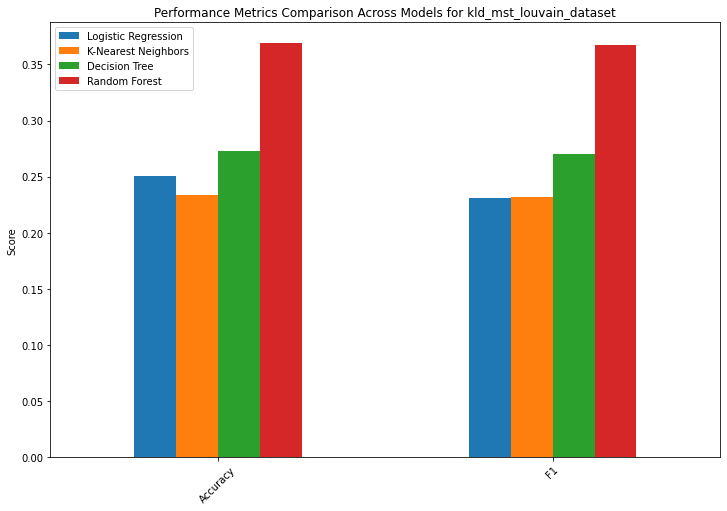

In [9]:
### run the constructed malware families here

import os

# Get test features and labels from test_data
X_test = test_data.drop(columns=['label'])
y_test = test_data['label']

# directory to save output
output_dir = 'output'

# loop over all the dataframes in dfs
for i, df in enumerate(dfs):
    
    # ignore 'og_dataset.csv'
    if 'og_dataset.csv' in filenames[i]:
        continue

    # fill NaNs with 0
    df = df.fillna(0)

    # split predictors and target
    X_train = df.drop(columns=['label'])
    y_train = df['label']

    # list to store metrics for each model
    metrics = []

    # split the filename to get only the second part
    dataset_name = os.path.split(filenames[i])[-1].split('.')[0]
    dataset_dir = os.path.join(output_dir, dataset_name)
    if not os.path.exists(dataset_dir):
        os.makedirs(dataset_dir)

    # Save train dataset for each model
    X_train.to_csv(os.path.join(dataset_dir, 'train_data.csv'), index=False)
    y_train.to_frame().to_csv(os.path.join(dataset_dir, 'train_labels.csv'), index=False)

    # loop over all models
    for j, model in enumerate(models):
        model_name = model_names[j]
        model_dir = os.path.join(dataset_dir, model_name)

        if not os.path.exists(model_dir):
            os.makedirs(model_dir)
            
        # apply model
        accuracy, f1, sensitivity, specificity, conf_matrix = apply_model(model, X_train, X_test, y_train, y_test)
        metrics.append([accuracy, f1, sensitivity, specificity])
        
        # print metrics
        print(f'Metrics for {model_name}:')
        print(f'Accuracy: {accuracy}')
        print(f'F1 Score: {f1}')
        print(f'Sensitivity: {sensitivity}')
        print(f'Specificity: {specificity}')
        print(f'Confusion Matrix:\n {conf_matrix}')
        print('-'*50)

        # save metrics to a csv file
        metrics_df = pd.DataFrame([[accuracy, f1, sensitivity, specificity]], 
                                  columns=['Accuracy', 'F1', 'Sensitivity', 'Specificity'],
                                  index=[model_name])
        metrics_df.to_csv(os.path.join(model_dir, 'metrics.csv'))

        # plot confusion matrix
        fig, ax = plt.subplots(figsize=(5,5))
        sns.heatmap(conf_matrix, annot=True, fmt=".0f", square = True, cmap = 'Blues')
        ax.set_ylabel('Actual')
        ax.set_xlabel('Predicted')
        ax.set_title(f'Confusion Matrix for {model_name}')
        fig.savefig(os.path.join(model_dir, 'confusion_matrix.png'))

    # Save test dataset for each model
    X_test.to_csv(os.path.join(dataset_dir, 'test_data.csv'), index=False)
    y_test.to_frame().to_csv(os.path.join(dataset_dir, 'test_labels.csv'), index=False)
        
    # Comparing the performance metrics across models
    metrics_df = pd.DataFrame(metrics, columns=['Accuracy', 'F1', 'Sensitivity', 'Specificity'], index=model_names)
    metrics_df = metrics_df.drop(columns=['Sensitivity', 'Specificity'])  # drop the 'Sensitivity' and 'Specificity' columns
    metrics_df = metrics_df.transpose()  # transpose the dataframe for easier plotting

    # plot the metrics
    fig, ax = plt.subplots(figsize=(12,8))
    metrics_df.plot(kind='bar', ax=ax)
    ax.set_title(f'Performance Metrics Comparison Across Models for {dataset_name}')
    ax.set_ylabel('Score')
    plt.xticks(rotation=45)
    fig.savefig(os.path.join(dataset_dir, 'metrics_comparison.png'))

    # add to results
    results[dataset_name] = metrics_df

# save results to a csv file
results_df = pd.concat(results)
results_df.to_csv(os.path.join(output_dir, 'results.csv'))

In [9]:
import pandas as pd
import os

# Root directory
output_dir = 'output'

# Prepare an empty dataframe to hold the data
df_data = pd.DataFrame(columns=['Metric', 'Size', 'Method', 'Algorithm', 'Accuracy', 'F1', 'Sensitivity', 'Specificity'])

# Loop through all subdirectories in the output directory
for dataset_dir in os.listdir(output_dir):
    if dataset_dir == 'og_dataset':  # handle 'og_dataset' specifically
        dataset_path = os.path.join(output_dir, dataset_dir)
        for algorithm_dir in os.listdir(dataset_path):
            algorithm_path = os.path.join(dataset_path, algorithm_dir)
            
            # Check if algorithm_path is a directory
            if not os.path.isdir(algorithm_path):
                continue

            # Load metrics.csv
            metrics_df = pd.read_csv(os.path.join(algorithm_path, 'metrics.csv'))

            # Append data to df_data
            df_data = df_data.append({'Metric': 'original_data',
                                      'Size': 'N/A',
                                      'Method': 'N/A',
                                      'Algorithm': algorithm_dir,
                                      'Accuracy': metrics_df.loc[0, 'Accuracy'],
                                      'F1': metrics_df.loc[0, 'F1'],
                                      'Sensitivity': metrics_df.loc[0, 'Sensitivity'],
                                      'Specificity': metrics_df.loc[0, 'Specificity']}, ignore_index=True)
        continue

    dataset_path = os.path.join(output_dir, dataset_dir)
    
    # Check if dataset_path is a directory
    if not os.path.isdir(dataset_path):
        continue
    
    # Extract attributes from the dataset directory name
    metric, size, method, _ = dataset_dir.split('_')
    # Convert '05' to '0.5'
    if size == '05':
        size = '0.5'
    
    # Loop through all algorithm directories
    for algorithm_dir in os.listdir(dataset_path):
        algorithm_path = os.path.join(dataset_path, algorithm_dir)
        
        # Check if algorithm_path is a directory
        if not os.path.isdir(algorithm_path):
            continue

        # Load metrics.csv
        metrics_df = pd.read_csv(os.path.join(algorithm_path, 'metrics.csv'))

        # Append data to df_data
        df_data = df_data.append({'Metric': metric,
                                  'Size': size,
                                  'Method': method,
                                  'Algorithm': algorithm_dir,
                                  'Accuracy': metrics_df.loc[0, 'Accuracy'],
                                  'F1': metrics_df.loc[0, 'F1'],
                                  'Sensitivity': metrics_df.loc[0, 'Sensitivity'],
                                  'Specificity': metrics_df.loc[0, 'Specificity']}, ignore_index=True)
        
# Print the created DataFrame
print(df_data)

# write to disk in output dir
df_data.to_csv(os.path.join(output_dir, 'results_toplot.csv'))


C:\Users\cayde\AppData\Local\Temp\ipykernel_15416\3869399061.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append({'Metric': metric,
C:\Users\cayde\AppData\Local\Temp\ipykernel_15416\3869399061.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append({'Metric': metric,
C:\Users\cayde\AppData\Local\Temp\ipykernel_15416\3869399061.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append({'Metric': metric,
C:\Users\cayde\AppData\Local\Temp\ipykernel_15416\3869399061.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append({'Metric': metric,
C:\Users\cay

           Metric Size   Method            Algorithm  Accuracy        F1  \
0             jsd  0.5       gn        Decision Tree  0.997187  0.997186   
1             jsd  0.5       gn  K-Nearest Neighbors   0.65729  0.652954   
2             jsd  0.5       gn  Logistic Regression  0.369902  0.360551   
3             jsd  0.5       gn        Random Forest  0.997187  0.997187   
4             jsd  0.5  louvain        Decision Tree  0.731364  0.732226   
5             jsd  0.5  louvain  K-Nearest Neighbors  0.503985  0.503817   
6             jsd  0.5  louvain  Logistic Regression  0.323957  0.297586   
7             jsd  0.5  louvain        Random Forest  0.787154  0.788793   
8             jsd  mst       gn        Decision Tree  0.997187  0.997186   
9             jsd  mst       gn  K-Nearest Neighbors  0.656821  0.652368   
10            jsd  mst       gn  Logistic Regression  0.360056  0.349965   
11            jsd  mst       gn        Random Forest  0.995781   0.99578   
12          

C:\Users\cayde\AppData\Local\Temp\ipykernel_15416\3869399061.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append({'Metric': metric,
C:\Users\cayde\AppData\Local\Temp\ipykernel_15416\3869399061.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append({'Metric': metric,
C:\Users\cayde\AppData\Local\Temp\ipykernel_15416\3869399061.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append({'Metric': metric,
C:\Users\cayde\AppData\Local\Temp\ipykernel_15416\3869399061.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append({'Metric': metric,
C:\Users\cay

In [ ]:
# top 15 pair wise freq of each constructed family